In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
k=3
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('kmeans.csv')
print(X)

    X1   X2
0  5.9  3.2
1  4.6  2.9
2  6.2  2.8
3  4.7  3.2
4  5.5  4.2
5  5.0  3.0
6  4.9  3.1
7  6.7  3.1
8  5.1  3.8
9  6.0  3.0


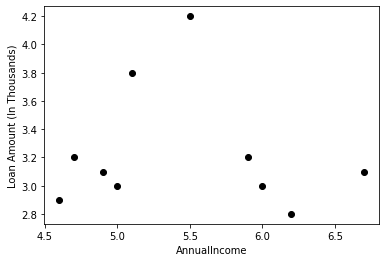

In [4]:
X = X[["X1","X2"]]
plt.scatter(X["X1"],X["X2"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [5]:
x1 = X['X1'].values
x2 = X['X2'].values

In [6]:
x1

array([5.9, 4.6, 6.2, 4.7, 5.5, 5. , 4.9, 6.7, 5.1, 6. ])

In [7]:
x2

array([3.2, 2.9, 2.8, 3.2, 4.2, 3. , 3.1, 3.1, 3.8, 3. ])

In [8]:
X = np.array(list(zip(x1,x2)))
print(X)

[[5.9 3.2]
 [4.6 2.9]
 [6.2 2.8]
 [4.7 3.2]
 [5.5 4.2]
 [5.  3. ]
 [4.9 3.1]
 [6.7 3.1]
 [5.1 3.8]
 [6.  3. ]]


In [9]:
C_x = [6.2,6.6,6.5]
C_y = [3.2,3.7,3.0]

In [10]:
Centroid = np.array(list(zip(C_x,C_y)))
print("Initial Centroids")
print(Centroid.shape)

Initial Centroids
(3, 2)


In [11]:
print(Centroid)

[[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]]


In [12]:
type(Centroid)

numpy.ndarray

In [13]:
Centroid_old = np.zeros(Centroid.shape)
print(Centroid_old)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [14]:
clusters = np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
def euclidean(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [18]:
error = euclidean(Centroid,Centroid_old,None)
print(error)

12.53714481052205


In [19]:
iterr = 0

In [20]:
while error != 0:
        iterr = iterr + 1
        for i in range(len(X)):
            distances = euclidean(X[i], Centroid)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        Centroid_old = deepcopy(Centroid)
        print("Old Centroid")
        print(Centroid_old)     
        for p in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == p]
            Centroid[p] = np.mean(points, axis=0)
        print(" New Centroids after ", iterr," Iteration \n", Centroid)
        error = euclidean(Centroid, Centroid_old, None)
        print("Error  ... ",error)
        print("Data points belong to which cluster")
        print(clusters)
        print("********************************************************")

Old Centroid
[[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]]
 New Centroids after  1  Iteration 
 [[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
Error  ...  1.588639515498743
Data points belong to which cluster
[0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
********************************************************
Old Centroid
[[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
 New Centroids after  2  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error  ...  0.5484788798419251
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
********************************************************
Old Centroid
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
 New Centroids after  3  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error  ...  0.0
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
********************************************************
